<h1>Diabetes prediction with KNN.<h1>

Outcome = 1 -> Diabetes, Outcome = 0 -> Not diabetes 

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
#Load dataset in local storage
data = pd.read_csv("diabetes.csv")
#Check data (first 5 line)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


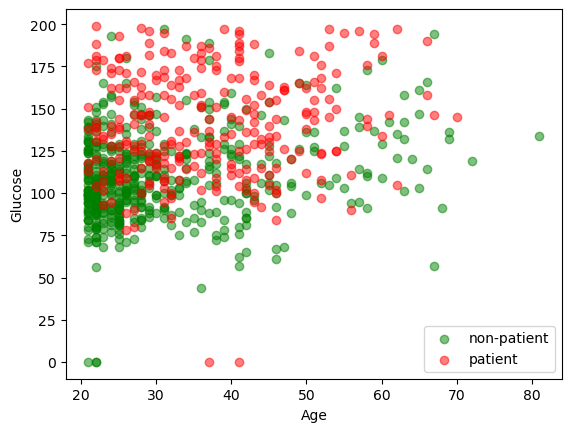

In [7]:
patient = data[data.Outcome == 1]
non_patient = data[data.Outcome == 0]

#To observe people's disease distribution chart
plt.scatter(non_patient.Age, non_patient.Glucose, color = "green", label = "non-patient", alpha= 0.5)
plt.scatter(patient.Age, patient.Glucose, color="red", label="patient", alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [16]:
#Drop the real results (Outcomes)
paitent_or_not = data.Outcome.values
orginal_data = data.drop(["Outcome"], axis = 1)

# Normalize the data [0-1]
process_data = (orginal_data - np.min(orginal_data)) / (np.max(orginal_data) - np.min(orginal_data))

#before
print("data, before normalization process:")
print(orginal_data.head())

#after
print("data after normalization process:")
print(process_data.head())


data, before normalization process:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
data after normalization process:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.00000

In [23]:
#Split data into training set and test set (80-20)
x_train, x_test, y_train, y_test = train_test_split(process_data, paitent_or_not, test_size=0.2, random_state=1)
#Create KNN Model
knn = KNeighborsClassifier(n_neighbors=3) #n_neighbors = k
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("Validation test result of test data for k=3", knn.score(x_test, y_test))

Validation test result of test data for k=3 0.7857142857142857


In [26]:
#To determine the most optimized k value in this dataset according to the KNN model
i = 1
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    print("Validation test result of test data for k =",i, ":", knn.score(x_test, y_test))
    i += 1


Validation test result of test data for k = 1 : 0.6948051948051948
Validation test result of test data for k = 2 : 0.7402597402597403
Validation test result of test data for k = 3 : 0.7857142857142857
Validation test result of test data for k = 4 : 0.7597402597402597
Validation test result of test data for k = 5 : 0.7987012987012987
Validation test result of test data for k = 6 : 0.7922077922077922
Validation test result of test data for k = 7 : 0.8116883116883117
Validation test result of test data for k = 8 : 0.7922077922077922
Validation test result of test data for k = 9 : 0.7857142857142857
Validation test result of test data for k = 10 : 0.7922077922077922
Validation test result of test data for k = 11 : 0.7987012987012987
Validation test result of test data for k = 12 : 0.7987012987012987
Validation test result of test data for k = 13 : 0.8051948051948052
Validation test result of test data for k = 14 : 0.7922077922077922
Validation test result of test data for k = 15 : 0.805194

In [40]:
#Normalization for a input to prediction
def normalize_input(input_data):
    normalized_input = (input_data - np.min(orginal_data)) / (np.max(orginal_data) - np.min(orginal_data))
    return normalized_input

input_data = [2, 90, 72, 35, 0, 35, 0.620, 40]
normalized_input = normalize_input(input_data)
prediction = knn.predict([normalized_input])
if prediction == 1:
    print("This person is likely to have diabetes.")
else:
    print("This person is not likely to have diabetes.")





This person is not likely to have diabetes.


In [42]:
#Save the model .h5
import joblib
joblib.dump(knn, 'diabetes_model.h5')


['diabetes_model.h5']